In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
import pathlib

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from tensorflow.keras.models import Sequential
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

In [18]:
data_dir_train= '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
data_dir_test='/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [19]:
folders=glob('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*')
print(f'number of output classes in train data: {len(folders)}')
folders=glob('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/*')
print(f'number of output classes in train data: {len(folders)}')

number of output classes in train data: 9
number of output classes in train data: 9


In [20]:
batch_size = 32
img_height = 180
img_width = 180

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset='training',seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,subset='validation',seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [24]:
class_names = train_ds.class_names
print(class_names)
print('\n')
print(val_ds.class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


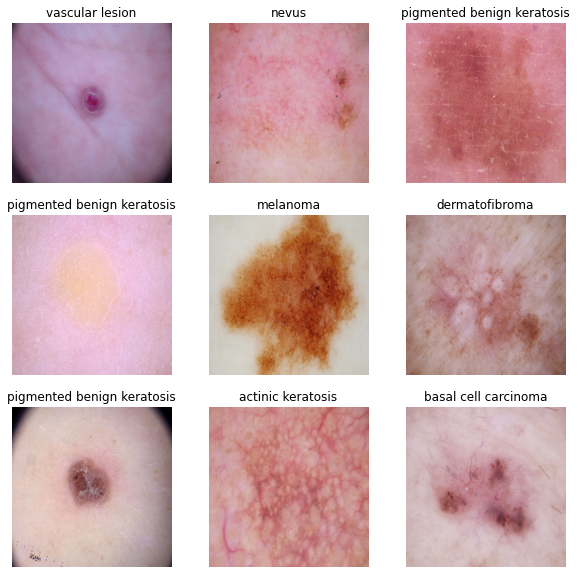

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images ,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

### your code goes here, you can use training or validation data to visualize

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 575s 2s/step - loss: 2.2152 - accuracy: 0.2024 - val_loss: 1.8020 - val_accuracy: 0.3266
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6447 - accuracy: 0.4258 - val_loss: 1.6259 - val_accuracy: 0.4519
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.5362 - accuracy: 0.4694 - val_loss: 1.4813 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 1s 20ms/step - loss: 1.3698 - accuracy: 0.5007 - val_loss: 1.3472 - val_accuracy: 0.5391
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2343 - accuracy: 0.5718 - val_loss: 1.5228 - val_accuracy: 0.4787
Epoch 6/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2545 - accuracy: 0.5508 - val_loss: 1.3792 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1276 - accuracy: 0.6142 - val_loss: 1.3672 - val_accuracy: 0.5213
Epoch 8/20
56

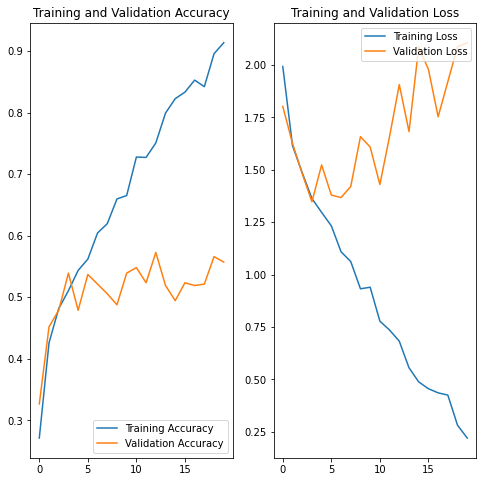

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

##### after model fit plots shown the characteristics of overfitting, the training accuracy keeps increasing upto 90% with increase in number of epochs and validation accuracy keeps changing around 40% to 50% same with loss as well trianing loss keeps decreasing with more  epochs and validation loss keeps increasing with more epochs

## Data Augumentation

In [ ]:
##data augumentation
data_augmentation=keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),layers.experimental.preprocessing.RandomRotation(0.1),layers.experimental.preprocessing.RandomZoom(0.1),])

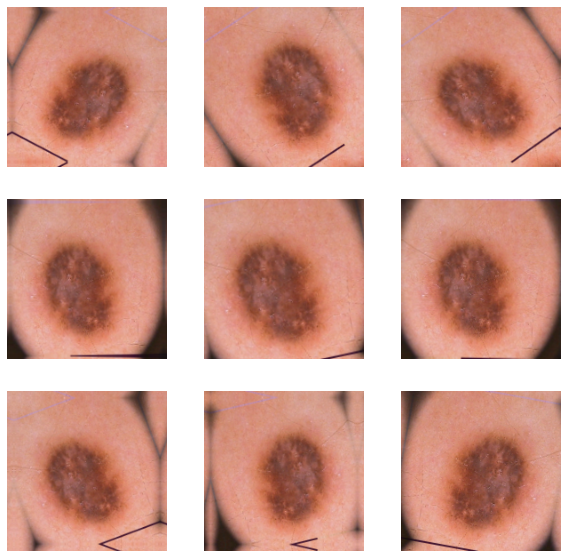

In [ ]:
#Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
## layers with dropout
model = Sequential([data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 28ms/step - loss: 2.1919 - accuracy: 0.1955 - val_loss: 1.9232 - val_accuracy: 0.2931
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.7729 - accuracy: 0.3488 - val_loss: 1.5023 - val_accuracy: 0.5123
Epoch 3/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4921 - accuracy: 0.4799 - val_loss: 1.4026 - val_accuracy: 0.5324
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4022 - accuracy: 0.5107 - val_loss: 1.4283 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 1.3268 - accuracy: 0.5340 - val_loss: 1.3771 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 1s 22ms/step - loss: 1.2140 - accuracy: 0.5659 - val_loss: 1.4256 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.2231 - accuracy: 0.5679 - val_loss: 1.4309 - val_accuracy: 0.5257
Epoch 8/20
56

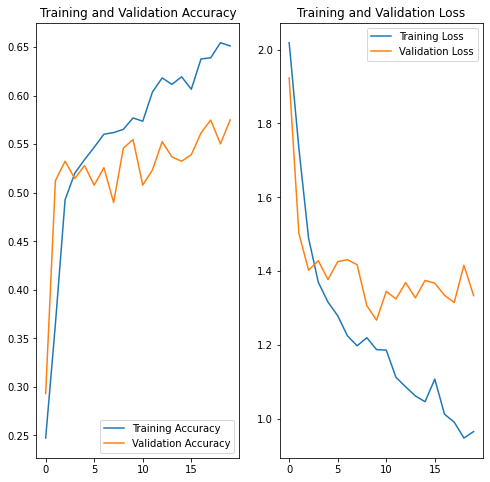

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
#### after data augumentation and adding dropout layers to network, still model is overfitting and training accuracy went upto 63% and validation accuracy went upto 55% and  validation accuracy increased from previous validation accuracy,training accuracy reduced.

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch)
    break

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
## Your code goes here.
from glob import glob
class_count={}
for i in class_names:
    image_count_train = len(list(data_dir_train.glob(f'{i}/*.jpg')))
    #print(image_count_train)
    class_count[i]=image_count_train

In [ ]:
class_count

In [ ]:
df=pd.DataFrame(class_count,index = [1])
df

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
-      seborrheic keratosis has least number of samples 
#### -  Which classes dominate the data in terms proportionate number of samples?

-      pigmented benign keratosis has more number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [6]:
!pip install Augmentor

In [7]:
import Augmentor

In [25]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9630741C50>: 100%|██████████| 500/500 [00:19<00:00, 25.69 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F963DF95950>: 100%|██████████| 500/500 [00:19<00:00, 25.81 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F967D593A50>: 100%|██████████| 500/500 [00:19<00:00, 25.11 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9630732C10>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F9630748490>: 100%|██████████| 500/500 [01:19<00:00,  6.25 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F963C9A99D0>: 100%|██████████| 500/500 [00:19<00:00, 25.85 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F963D7DB8D0>: 100%|██████████| 500/500 [00:42<00:00, 11.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9630763A90>: 100%|██████████| 500/500 [00:19<00:00, 26.04 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F963DFEA090>: 100%|██████████| 500/500 [00:19<00:00, 26.05 Samples/s]


In [ ]:
from glob import glob
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

### Lets see the distribution of augmented data after adding new images to the original training data.


In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029967.jpg_3d0f529e-28f4-464f-83b5-e4d1b6d57d83.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025771.jpg_69a2cc27-d2ad-4d15-9618-ed6bece962fa.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027141.jpg_70efa502-308b-45e6-86df-bc3715a9b82e.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025223.jpg_2755d319-742a-49e3-804c-1a7608980171.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0031271.jpg_7ae7aa18-5932-4648-be43-610fbee43e6b.jpg',


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_new

{'/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029967.jpg_3d0f529e-28f4-464f-83b5-e4d1b6d57d83.jpg': 'dermatofibroma',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025771.jpg_69a2cc27-d2ad-4d15-9618-ed6bece962fa.jpg': 'dermatofibroma',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0027141.jpg_70efa502-308b-45e6-86df-bc3715a9b82e.jpg': 'dermatofibroma',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025223.jpg_2755d319-742a-49e3-804c-1a7608980171.jpg': 'dermatofibroma',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output/dermatofibro

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2['Label'].value_counts()

seborrheic keratosis          500
nevus                         500
squamous cell carcinoma       500
dermatofibroma                500
vascular lesion               500
basal cell carcinoma          500
melanoma                      500
actinic keratosis             500
pigmented benign keratosis    500
Name: Label, dtype: int64

In [ ]:
df2.tail(500)

,Path,Label
4000,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
4001,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
4002,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
4003,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
4004,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
...,...,...
4495,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
4496,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
4497,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma
4498,/content/gdrive/MyDrive/Skin cancer ISIC The I...,basal cell carcinoma


#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train= '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
#normalization_layer=layers.experimental.preprocessing.Rescaling(1./255)

##normalizing train_data
#normalized_train_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
#image_batch,labels_batch=next(iter(normalized_train_ds))

#first_image=image_batch[0]
#np.min(first_image[0]),np.max(first_image)



#


In [ ]:
#normalizing val_data
#normalized_val_ds=val_ds.map(lambda x,y:(normalization_layer(x),y))

#image_batch,labels_batch=next(iter(normalized_val_ds))

#first_image=image_batch[0]
#np.min(first_image[0]),np.max(first_image)


(0.49950984, 0.86078435)

#### **Todo:**  Train your model

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(20, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(40, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(60, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(80, (3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dropout(0.4),
  layers.Dense(512, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 20)      560       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 40)        7240      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 40)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 60)        21660     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 60)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,validation_data=val_ds,epochs=30)

Epoch 1/30
169/169 [==============================] - 38s 217ms/step - loss: 0.1068 - accuracy: 0.9525 - val_loss: 0.6071 - val_accuracy: 0.8656
Epoch 2/30
169/169 [==============================] - 38s 220ms/step - loss: 0.1358 - accuracy: 0.9458 - val_loss: 0.6522 - val_accuracy: 0.8545
Epoch 3/30
169/169 [==============================] - 39s 223ms/step - loss: 0.1005 - accuracy: 0.9572 - val_loss: 0.6728 - val_accuracy: 0.8575
Epoch 4/30
169/169 [==============================] - 38s 219ms/step - loss: 0.0948 - accuracy: 0.9594 - val_loss: 0.6556 - val_accuracy: 0.8693
Epoch 5/30
169/169 [==============================] - 39s 222ms/step - loss: 0.0971 - accuracy: 0.9566 - val_loss: 0.6880 - val_accuracy: 0.8545
Epoch 6/30
169/169 [==============================] - 39s 223ms/step - loss: 0.1361 - accuracy: 0.9484 - val_loss: 0.7440 - val_accuracy: 0.8478
Epoch 7/30
169/169 [==============================] - 39s 226ms/step - loss: 0.1096 - accuracy: 0.9557 - val_loss: 0.7595 - val_ac

#### **Todo:**  Visualize the model results

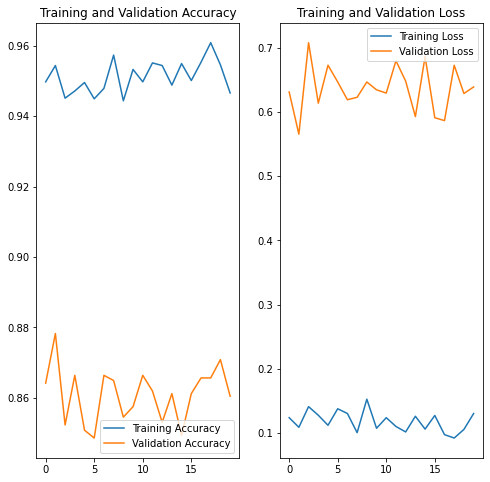

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

### having many samples in each class reduce the ovefitting 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model

In [ ]:
model.save('cancer_model2.h5')

In [ ]:
model=load_model('cancer_model2.h5')

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [ ]:
y_pred=model.predict(test_ds)

In [ ]:
y_pred

array([[6.88668760e-03, 2.12034117e-02, 1.78742371e-02, ...,
        2.06011464e-04, 9.35564697e-01, 1.25546212e-05],
       [9.86970146e-04, 2.42769465e-01, 3.53445292e-01, ...,
        3.08691233e-04, 1.00626885e-05, 7.20833996e-05],
       [8.99285253e-04, 9.61776853e-01, 1.83550399e-02, ...,
        9.38585981e-06, 9.25738271e-03, 2.20152055e-04],
       ...,
       [1.49815097e-01, 1.33535673e-03, 9.38491151e-03, ...,
        4.38526695e-06, 8.05690348e-01, 1.49598162e-13],
       [2.35387012e-02, 9.65398476e-02, 2.97488350e-05, ...,
        1.57664381e-02, 3.86731017e-06, 4.07541756e-06],
       [5.09226695e-04, 2.21981281e-05, 2.03116368e-09, ...,
        3.41645752e-08, 1.23893992e-10, 3.58512295e-07]], dtype=float32)

In [ ]:
pred_cat=tf.argmax(y_pred,axis=1)

In [ ]:
true_cat=tf.concat([y for x,y in test_ds],axis=0)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(pred_cat,true_cat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.21      0.23        19
           2       0.00      0.00      0.00         8
           3       0.19      0.21      0.20        14
           4       0.38      0.16      0.22        38
           5       0.12      0.09      0.10        23
           6       0.00      0.00      0.00         1
           7       0.06      0.12      0.08         8
           8       0.00      0.00      0.00         5

    accuracy                           0.14       118
   macro avg       0.11      0.09      0.09       118
weighted avg       0.21      0.14      0.16       118



In [ ]:
model.evaluate(test_ds)

4/4 [==============================] - 4s 11ms/step - loss: 6.5592 - accuracy: 0.3983


[6.559200286865234, 0.39830508828163147]